In [ ]:
# Importação das bibliotecas necessárias

import graphviz
import random
import time
from IPython.display import Image, display, clear_output

In [ ]:
# Classe do nó da Árvore Rubro-Negra
class RBNode:
    def __init__(self, chave, cor='VERMELHO'):
        self.chave = chave
        self.esquerda = None
        self.direita = None
        self.pai = None
        self.cor = cor

    def definir_esquerda(self, node):
        # Define o filho esquerdo com ligação dupla
        self.esquerda = node
        if node is not None:
            node.pai = self

    def definir_direita(self, node):
        # Define o filho direito com ligação dupla
        self.direita = node
        if node is not None:
            node.pai = self

    def eh_folha(self):
        # Verifica se o nó é uma folha
        return self.esquerda is None and self.direita is None

class ArvoreRubroNegra:
    # Construção da estrutura da Árvore Rubro-Negra
    
    def __init__(self):
        self.NIL = RBNode(None, 'PRETO')
        self.raiz = self.NIL
        self.tamanho = 0
    
    def inserir(self, chave):
        novo_node = RBNode(chave)
        novo_node.esquerda = self.NIL
        novo_node.direita = self.NIL
        
        self._inserir_bst(novo_node)
        self._corrigir_insercao(novo_node)
        self.tamanho += 1
    
    def _inserir_bst(self, node):
        # Inserção como árvore binária de busca comum (ignora cores)
        y = None      # Vai guardar o futuro pai do novo nó
        x = self.raiz # Ponteiro para percorrer a árvore
        
        # Desce na árvore até encontrar posição vazia (NIL)
        while x != self.NIL:
            y = x  # y sempre guarda o nó atual antes de descer
            if node.chave < x.chave:
                x = x.esquerda  # Desce à esquerda se menor
            else:
                x = x.direita   # Desce à direita se maior/igual
        
        # Conecta o novo nó ao pai encontrado
        node.pai = y
        
        # Define onde conectar: raiz, esquerda ou direita
        if y is None:
            self.raiz = node  # Primeiro nó da árvore
        elif node.chave < y.chave:
            y.definir_esquerda(node)  # Conecta à esquerda
        else:
            y.definir_direita(node)   # Conecta à direita
    
    def _corrigir_insercao(self, node):
        # Corrige violações das propriedades rubro-negra após inserção
        # Loop continua enquanto há violação (pai vermelho)
        while node != self.raiz and node.pai.cor == 'VERMELHO':
            
            # CASO A: Pai está à esquerda do avô
            if node.pai == node.pai.pai.esquerda:
                tio = node.pai.pai.direita  # Tio é o filho direito do avô
                
                # SUBCASO A1: Tio é vermelho então faça recoloração
                if tio.cor == 'VERMELHO':
                    node.pai.cor = 'PRETO'        # Pai fica preto
                    tio.cor = 'PRETO'             # Tio fica preto
                    node.pai.pai.cor = 'VERMELHO' # Avô fica vermelho
                    node = node.pai.pai           # Move para avô (pode gerar nova violação)
                
                # SUBCASO A2: Tio é preto então faça rotações
                else:
                    # Se em ziguezague, alinha primeiro
                    if node == node.pai.direita:
                        node = node.pai
                        self._rotacionar_esquerda(node)  # Rotação preparatória
                    
                    # Recolore e rotaciona para balancear
                    node.pai.cor = 'PRETO'                 # Pai fica preto
                    node.pai.pai.cor = 'VERMELHO'          # Avô fica vermelho
                    self._rotacionar_direita(node.pai.pai) # Rotação no avô
            
            # CASO B: Pai está à direita do avô (simétrico ao Caso A)
            else:
                tio = node.pai.pai.esquerda  # Tio é o filho esquerdo do avô
                
                # SUBCASO B1: Tio é vermelho então faça recoloração
                if tio.cor == 'VERMELHO':
                    node.pai.cor = 'PRETO'        # Pai fica preto
                    tio.cor = 'PRETO'             # Tio fica preto
                    node.pai.pai.cor = 'VERMELHO' # Avô fica vermelho
                    node = node.pai.pai           # Move para avô
                
                # SUBCASO B2: Tio é preto então faça rotações
                else:
                    # Se em ziguezague, alinha primeiro
                    if node == node.pai.esquerda:
                        node = node.pai
                        self._rotacionar_direita(node)  # Rotação preparatória
                    
                    # Recolore e rotaciona para balancear
                    node.pai.cor = 'PRETO'                # Pai fica preto
                    node.pai.pai.cor = 'VERMELHO'         # Avô fica vermelho
                    self._rotacionar_esquerda(node.pai.pai) # Rotação no avô
        
        # Raiz sempre preta
        self.raiz.cor = 'PRETO'
    
    def _rotacionar_esquerda(self, x):
        # Rotação à esquerda: x desce, y (filho direito) sobe
        y = x.direita  # y será a nova raiz desta subárvore
        x.direita = y.esquerda  # Subárvore esquerda de y vira direita de x
        
        # Atualiza pai da subárvore que mudou de lugar
        if y.esquerda != self.NIL:
            y.esquerda.pai = x
        
        # y assume a posição de x na árvore
        y.pai = x.pai
        
        # Conecta y ao pai de x (ou torna y a nova raiz)
        if x.pai is None:
            self.raiz = y
        elif x == x.pai.esquerda:
            x.pai.definir_esquerda(y)
        else:
            x.pai.definir_direita(y)
        
        # x vira filho esquerdo de y
        y.definir_esquerda(x)
    
    def _rotacionar_direita(self, y):
        # Rotação à direita: y desce, x (filho esquerdo) sobe
        x = y.esquerda  # x será a nova raiz desta subárvore
        y.esquerda = x.direita  # Subárvore direita de x vira esquerda de y
        
        # Atualiza pai da subárvore que mudou de lugar
        if x.direita != self.NIL:
            x.direita.pai = y
        
        # x assume a posição de y na árvore
        x.pai = y.pai
        
        # Conecta x ao pai de y (ou torna x a nova raiz)
        if y.pai is None:
            self.raiz = x
        elif y == y.pai.direita:
            y.pai.definir_direita(x)
        else:
            y.pai.definir_esquerda(x)
        
        # y vira filho direito de x
        x.definir_direita(y)
    
    def buscar(self, chave):
        # Busca uma chave na árvore (interface pública)
        return self._buscar_recursivo(self.raiz, chave)
    
    def _buscar_recursivo(self, node, chave):
        # Busca recursiva: como BST normal (ignora cores)
        if node == self.NIL:
            return False  # Chegou em folha, chave não encontrada
        
        if chave == node.chave:
            return True  # Chave encontrada
        elif chave < node.chave:
            return self._buscar_recursivo(node.esquerda, chave)  # Busca à esquerda
        else:
            return self._buscar_recursivo(node.direita, chave)   # Busca à direita
    
    def remover(self, chave):
        # Remove uma chave da árvore (interface pública)
        node = self._buscar_node(self.raiz, chave)  # Primeiro encontra o nó
        if node != self.NIL:
            self._remover_node(node)  # Remove e rebalanceia
            self.tamanho -= 1
    
    def _buscar_node(self, node, chave):
        # Busca iterativa que retorna o nó (não apenas True/False)
        while node != self.NIL and chave != node.chave:
            if chave < node.chave:
                node = node.esquerda  # Desce à esquerda
            else:
                node = node.direita   # Desce à direita
        return node  # Retorna o nó encontrado ou NIL
    
    def _remover_node(self, z):
        # Algoritmo de remoção BST adaptado para árvore rubro-negra
        y = z  # Nó que será efetivamente removido
        cor_original_y = y.cor  # Guarda cor original (importante para correção)
        
        # CASO 1: Nó z só tem filho direito (ou nenhum filho)
        if z.esquerda == self.NIL:
            x = z.direita  # x será o substituto
            self._transplantar(z, z.direita)  # Substitui z pelo filho direito
        
        # CASO 2: Nó z só tem filho esquerdo
        elif z.direita == self.NIL:
            x = z.esquerda  # x será o substituto
            self._transplantar(z, z.esquerda)  # Substitui z pelo filho esquerdo
        
        # CASO 3: Nó z tem ambos os filhos (caso mais complexo)
        else:
            y = self._minimo(z.direita)  # Sucessor de z (menor da subárvore direita)
            cor_original_y = y.cor  # Cor do sucessor (não de z)
            x = y.direita  # Filho direito do sucessor
            
            # Se sucessor é filho direto de z
            if y.pai == z:
                x.pai = y  # Ajusta ponteiro pai de x
            else:
                # Sucessor não é filho direto, precisa mover sua subárvore
                self._transplantar(y, y.direita)  # Remove y de sua posição
                y.direita = z.direita  # y herda filho direito de z
                y.direita.pai = y  # Atualiza pai
            
            # Agora substitui z por y
            self._transplantar(z, y)  # y toma lugar de z
            y.esquerda = z.esquerda  # y herda filho esquerdo de z
            y.esquerda.pai = y  # Atualiza pai
            y.cor = z.cor  # y assume a cor de z (preserva propriedades)
        
        # Se removemos um nó preto, pode violar propriedades da árvore RB
        if cor_original_y == 'PRETO':
            self._corrigir_remocao(x)  # Corrige violações
    
    def _transplantar(self, u, v):
        # Substitui a subárvore enraizada em u pela subárvore enraizada em v
        # Função auxiliar para remoção - move subárvores preservando estrutura
        
        if u.pai is None:
            # u era a raiz da árvore
            self.raiz = v  # v vira nova raiz
        elif u == u.pai.esquerda:
            # u era filho esquerdo de seu pai
            u.pai.definir_esquerda(v)  # v toma lugar de u à esquerda
        else:
            # u era filho direito de seu pai
            u.pai.definir_direita(v)   # v toma lugar de u à direita
        
        # v assume o pai de u (pode ser None se u era raiz)
        v.pai = u.pai
    
    def _minimo(self, node):
        # Encontra o nó com menor chave na subárvore
        while node.esquerda != self.NIL:
            node = node.esquerda  # Sempre desce à esquerda
        return node  # Retorna o nó mais à esquerda
    
    def _corrigir_remocao(self, x):
        # Corrige violações após remoção de nó preto
        # x é o nó que "herdou" a cor preta extra
        
        while x != self.raiz and x.cor == 'PRETO':
            # CASO A: x é filho esquerdo
            if x == x.pai.esquerda:
                w = x.pai.direita  # w é o irmão de x
                
                # SUBCASO A1: Irmão w é vermelho
                if w.cor == 'VERMELHO':
                    w.cor = 'PRETO'  # w fica preto
                    x.pai.cor = 'VERMELHO'  # pai fica vermelho
                    self._rotacionar_esquerda(x.pai)  # rotação converte em outros subcasos
                    w = x.pai.direita  # atualiza w após rotação
                
                # SUBCASO A2: w é preto e ambos filhos de w são pretos
                if w.esquerda.cor == 'PRETO' and w.direita.cor == 'PRETO':
                    w.cor = 'VERMELHO'  # w fica vermelho
                    x = x.pai  # "empurra" problema para cima
                else:
                    # SUBCASO A3: w é preto, filho esquerdo vermelho, direito preto
                    if w.direita.cor == 'PRETO':
                        w.esquerda.cor = 'PRETO'  # filho esquerdo fica preto
                        w.cor = 'VERMELHO'  # w fica vermelho
                        self._rotacionar_direita(w)  # prepara para subcaso A4
                        w = x.pai.direita  # atualiza w
                    
                    # SUBCASO A4: w é preto e filho direito é vermelho
                    w.cor = x.pai.cor  # w assume cor do pai
                    x.pai.cor = 'PRETO'  # pai fica preto
                    w.direita.cor = 'PRETO'  # filho direito fica preto
                    self._rotacionar_esquerda(x.pai)  # rotação final
                    x = self.raiz  # termina o loop
            
            # CASO B: x é filho direito (simétrico ao Caso A)
            else:
                w = x.pai.esquerda  # w é o irmão de x
                
                # SUBCASO B1: Irmão w é vermelho
                if w.cor == 'VERMELHO':
                    w.cor = 'PRETO'  # w fica preto
                    x.pai.cor = 'VERMELHO'  # pai fica vermelho
                    self._rotacionar_direita(x.pai)  # rotação converte em outros subcasos
                    w = x.pai.esquerda  # atualiza w após rotação
                
                # SUBCASO B2: w é preto e ambos filhos de w são pretos
                if w.direita.cor == 'PRETO' and w.esquerda.cor == 'PRETO':
                    w.cor = 'VERMELHO'  # w fica vermelho
                    x = x.pai  # "empurra" problema para cima
                else:
                    # SUBCASO B3: w é preto, filho direito vermelho, esquerdo preto
                    if w.esquerda.cor == 'PRETO':
                        w.direita.cor = 'PRETO'  # filho direito fica preto
                        w.cor = 'VERMELHO'  # w fica vermelho
                        self._rotacionar_esquerda(w)  # prepara para subcaso B4
                        w = x.pai.esquerda  # atualiza w
                    
                    # SUBCASO B4: w é preto e filho esquerdo é vermelho
                    w.cor = x.pai.cor  # w assume cor do pai
                    x.pai.cor = 'PRETO'  # pai fica preto
                    w.esquerda.cor = 'PRETO'  # filho esquerdo fica preto
                    self._rotacionar_direita(x.pai)  # rotação final
                    x = self.raiz  # termina o loop
        
        # x sempre fica preto no final (remove "cor preta extra")
        x.cor = 'PRETO'

    def obter_altura(self):
        # Retorna a altura da árvore
        return self._calcular_altura(self.raiz)
    
    def _calcular_altura(self, node):
        # Calcula a altura recursivamente
        if node == self.NIL:
            return 0
        return 1 + max(self._calcular_altura(node.esquerda), self._calcular_altura(node.direita))

def plotar_arvore_rb(arvore_rb, nome_arquivo='arvore_rubro_negra'):
    # Função para visualizar a árvore rubro-negra usando Graphviz
    
    dot = graphviz.Digraph(comment='Árvore Rubro-Negra')
    dot.attr(rankdir='TB')  # Direção top-bottom
    dot.attr('node', shape='circle', style='filled', fontcolor='white', fontsize='12', fontname='Arial Bold')
    dot.attr('edge', color='black', penwidth='2')
    
    def adicionar_nodes(node, node_id=0):
        # Adiciona nodes recursivamente ao grafo
        if node == arvore_rb.NIL:
            return node_id  # Para na folha NIL
        
        # Define cor de fundo: vermelho ou preto
        cor_fundo = 'red' if node.cor == 'VERMELHO' else 'black'
        
        # Cria o nó no grafo
        dot.node(str(node_id), str(node.chave), fillcolor=cor_fundo)
        
        current_id = node_id
        
        # Processa filho esquerdo
        if node.esquerda != arvore_rb.NIL:
            node_id += 1
            esquerda_id = node_id
            node_id = adicionar_nodes(node.esquerda, node_id)
            dot.edge(str(current_id), str(esquerda_id), label='E')
        
        # Processa filho direito
        if node.direita != arvore_rb.NIL:
            node_id += 1
            direita_id = node_id
            node_id = adicionar_nodes(node.direita, node_id)
            dot.edge(str(current_id), str(direita_id), label='D')
        
        return node_id
    
    # Constrói o grafo se árvore não estiver vazia
    if arvore_rb.raiz != arvore_rb.NIL:
        adicionar_nodes(arvore_rb.raiz)
    
    # Renderiza como arquivo PNG
    try:
        dot.format = 'png'
        dot.render(nome_arquivo, cleanup=True)
        return f"{nome_arquivo}.png"
    except Exception as e:
        print(f"Erro ao renderizar: {e}")
        print("Codigo DOT gerado:")
        print(dot.source)
        return None

Construção e balanceamento
Valores a serem inseridos: [29, 54, 21, 38, 31, 26, 28, 81, 44, 15, 16, 5, 4, 79, 45, 65, 89, 3, 56, 52, 88]



Passo 21/21: Inserindo valor 88
  Total de nodes: 21
  Altura atual: 5
  --> Arvore após inserir 88:


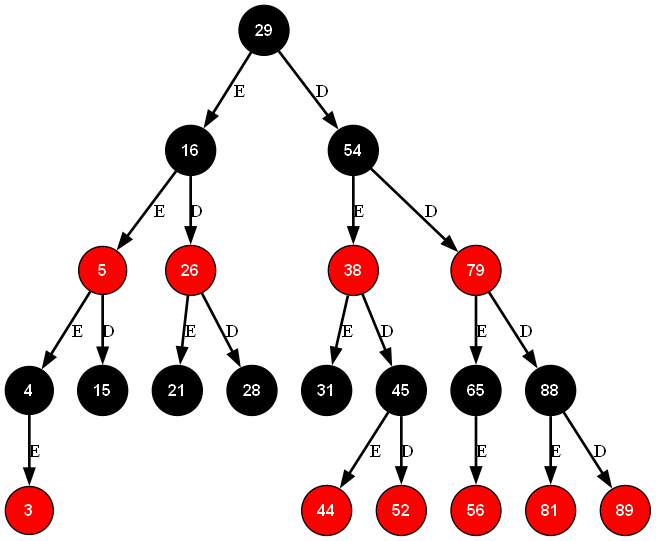



Construção completa
Arvore final com 21 nodes e altura 5


Demonstrações das funções de busca e remoção:

Buscando por 16: True
Buscando por 999: False

Removendo 26...
Nodes após remoção: 20
Verificando se 26 ainda existe: False

--> Árvore final após remoção de 26:


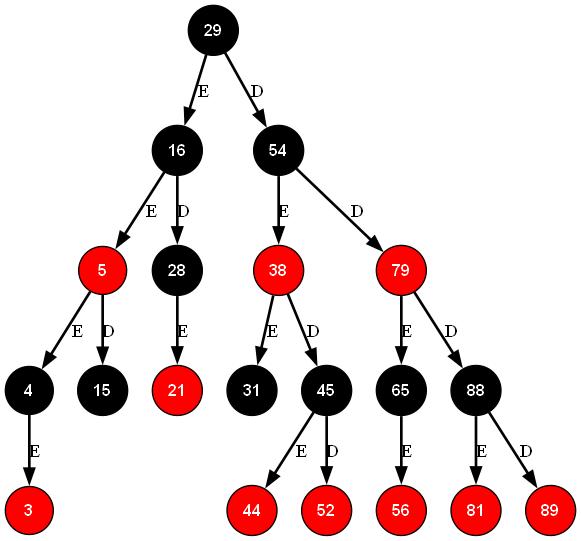



Processo concluído


In [13]:
# Processo de construção e balanceamento da árvore rubro-negra
print("Construção e balanceamento")

# Gerar lista de 21 valores aleatórios
valores = random.sample(range(1, 100), 21)
print(f"Valores a serem inseridos: {valores}")
print("\n")

arvore_rb = ArvoreRubroNegra()
nome_arquivo_fixo = 'arvore_rb_construcao'

# Inserção passo a passo com visualização na célula
for i, valor in enumerate(valores, 1):
    # Limpar output anterior
    clear_output(wait=True)
    
    print("Construção e balanceamento")
    print(f"Valores a serem inseridos: {valores}")
    print("\n")
    
    print(f"\nPasso {i}/21: Inserindo valor {valor}")
    
    # Inserir o valor
    arvore_rb.inserir(valor)
    
    # Mostrar estatísticas após inserção
    print(f"  Total de nodes: {arvore_rb.tamanho}")
    print(f"  Altura atual: {arvore_rb.obter_altura()}")
    print(f"  --> Arvore após inserir {valor}:")
    
    # Plotar árvore (sobreescreve o mesmo arquivo)
    arquivo_png = plotar_arvore_rb(arvore_rb, nome_arquivo_fixo)
    
    # Exibir imagem na célula
    if arquivo_png:
        display(Image(arquivo_png))
    
    # Pausa para visualização
    time.sleep(1.5)

print("\n")
print("Construção completa")
print(f"Arvore final com {arvore_rb.tamanho} nodes e altura {arvore_rb.obter_altura()}")

# Demonstrações
print("\n")
print("Demonstrações das funções de busca e remoção:")

valor_busca = valores[10]
print(f"\nBuscando por {valor_busca}: {arvore_rb.buscar(valor_busca)}")
print(f"Buscando por 999: {arvore_rb.buscar(999)}")

valor_remocao = valores[5]
print(f"\nRemovendo {valor_remocao}...")
arvore_rb.remover(valor_remocao)
print(f"Nodes após remoção: {arvore_rb.tamanho}")
print(f"Verificando se {valor_remocao} ainda existe: {arvore_rb.buscar(valor_remocao)}")

print(f"\n--> Árvore final após remoção de {valor_remocao}:")
arquivo_png_final = plotar_arvore_rb(arvore_rb, 'arvore_rb_final')
if arquivo_png_final:
    display(Image(arquivo_png_final))

print("\n")
print("Processo concluído")